<h2><b>Goals</b></h2>
1. If the temperature change over the years is a natural process or an unexpected trend<br/>
2. If there is an unusual temperature pattern for one or more countries that can provide us with more insights about human intervention

<b>Background:</b>
Approximately two-thirds of all industrial methane and carbon dioxide released into the atmosphere since 1854 can be traced to burning fossil fuels and producing cement. The carbon dioxide emissions from human activities are now higher than at any point in human history, further worsening the greenhouse effect contributing to global warming and the consequences of climate change. Recent data shows that global carbon dioxide emissions were 150 times higher in 2011 than they were in 1850.

<b>Biggest Contributors To Global Warming In The World By Country:</b><br/>
1	China	        27.51%<br/>
2	United States	14.75%<br/>
3	India	        6.43%<br/>
4	Russia	        4.86%<br/>
5	Japan	        2.99%<br/>
6	Brazil	        2.25%<br/>
7	Germany	        1.98%<br/>
8	Indonesia	    1.64%<br/>
9	Canada	        1.63%<br/>
10	Mexico	        1.62%<br/>
(https://www.worldatlas.com/articles/biggest-contributors-to-global-warming-in-the-world.html)

In [209]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
import datetime
from dateutil.relativedelta import relativedelta
import itertools
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.metrics import r2_score

pd.options.display.max_rows = 999

import warnings
warnings.filterwarnings("ignore")

<h2>Goal 1: To find out if the temperature change over the years is a natural process or an unexpected trend</h2>
GlobalTemperatures dataset has been analyzed to understand the current temperature trends and to predict temperatues in the future.

In [213]:
#Global Data: Import global temperatures data | Decompose and check for trend
df_Global = pd.DataFrame()
df_Global = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\Time Series datasets\Climate Change\GlobalTemperatures.csv")

df_Global['dt'] = pd.to_datetime(df_Global.dt)
df_Global.index = pd.to_datetime(df_Global.dt)
df_Global['Year'], df_Global['Month'] = df_Global['dt'].dt.year, df_Global['dt'].dt.month
df_Global.drop(['dt','LandAverageTemperatureUncertainty','LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'],axis=1,inplace=True)
df_Global.head(100)

LandAverageTemperature  Year  Month
dt                                             
1750-01-01                   3.034  1750      1
1750-02-01                   3.083  1750      2
1750-03-01                   5.626  1750      3
1750-04-01                   8.490  1750      4
1750-05-01                  11.573  1750      5
1750-06-01                  12.937  1750      6
1750-07-01                  15.868  1750      7
1750-08-01                  14.750  1750      8
1750-09-01                  11.413  1750      9
1750-10-01                   6.367  1750     10
1750-11-01                     NaN  1750     11
1750-12-01                   2.772  1750     12
1751-01-01                   2.495  1751      1
1751-02-01                   0.963  1751      2
1751-03-01                   5.800  1751      3
1751-04-01                   7.670  1751      4
1751-05-01                     NaN  1751      5
1751-06-01                  13.827  1751      6
1751-07-01                     NaN  1751      7
1751-08-01                  14.405  1751      8
1751-09-01                  10.673  1751      9
1751-10-01                     NaN  1751     10
1751-11-01                     NaN  1751     11
1751-12-01                     NaN  1751     12
1752-01-01                   0.348  1752      1
1752-02-01                     NaN  1752      2
1752-03-01                   5.806  1752      3
1752-04-01                   8.265  1752      4
1752-05-01                     NaN  1752      5
1752-06-01                     NaN  1752      6
1752-07-01                     NaN  1752      7
1752-08-01                     NaN  1752      8
1752-09-01                     NaN  1752      9
1752-10-01                   7.839  1752     10
1752-11-01                   7.335  1752     11
1752-12-01                   5.086  1752     12
1753-01-01                   2.039  1753      1
1753-02-01                   0.715  1753      2
1753-03-01                   5.424  1753      3
1753-04-01                   8.272  1753      4
1753-05-01                  12.186  1753      5
1753-06-01                  14.585  1753      6
1753-07-01                  15.092  1753      7
1753-08-01                  14.148  1753      8
1753-09-01                  13.322  1753      9
1753-10-01                   8.962  1753     10
1753-11-01                   5.353  1753     11
1753-12-01                   0.559  1753     12
1754-01-01                   1.574  1754      1
1754-02-01                  -1.249  1754      2
1754-03-01                   3.677  1754      3
1754-04-01                  11.610  1754      4
1754-05-01                  11.936  1754      5
1754-06-01                  14.388  1754      6
1754-07-01                  14.681  1754      7
1754-08-01                  13.556  1754      8
1754-09-01                  11.129  1754      9
1754-10-01                   9.582  1754     10
1754-11-01                   6.161  1754     11
1754-12-01                   4.587  1754     12
1755-01-01                   1.067  1755      1
1755-02-01                  -0.108  1755      2
1755-03-01                   3.607  1755      3
1755-04-01                   9.263  1755      4
1755-05-01                  12.881  1755      5
1755-06-01                  15.380  1755      6
1755-07-01                  14.397  1755      7
1755-08-01                  13.515  1755      8
1755-09-01                  11.773  1755      9
1755-10-01                   9.970  1755     10
1755-11-01                   5.958  1755     11
1755-12-01                   2.564  1755     12
1756-01-01                   3.887  1756      1
1756-02-01                   5.666  1756      2
1756-03-01                   4.192  1756      3
1756-04-01                  10.042  1756      4
1756-05-01                  14.164  1756      5
1756-06-01                  14.547  1756      6
1756-07-01                  13.906  1756      7
1756-08-01                  13.437  1756      8
1756-09-01                  12.652  1756      9
1756-10-01                  

LandAverageTemperature    12
Year                       0
Month                      0
dtype: int64
LandAverageTemperature    float64
Year                        int64
Month                       int64
dtype: object


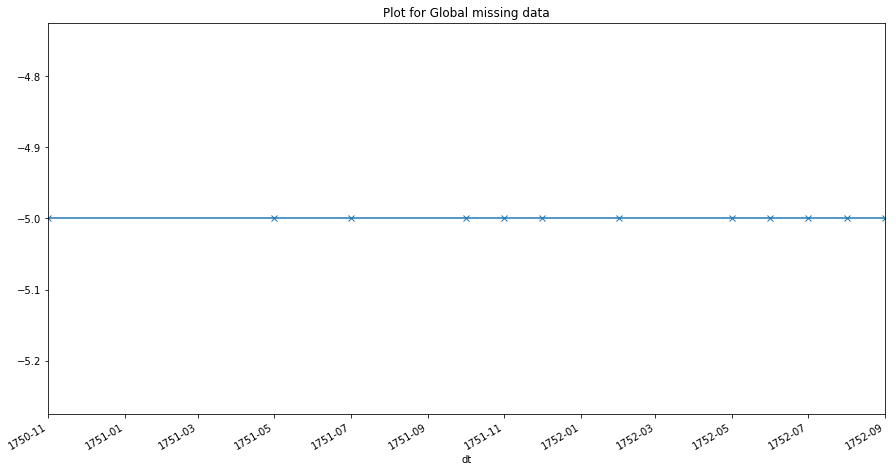

In [214]:
#Missing data
print(df_Global.isnull().sum())
print(df_Global.dtypes)
df_Global_nullValues = df_Global.fillna(-5)
df_Global_nullValues[(df_Global_nullValues['LandAverageTemperature'] == -5)]['LandAverageTemperature'].plot(figsize=(15,8), marker='x', title='Plot for Global missing data')

In [215]:
df_Global.describe()

LandAverageTemperature         Year        Month
count             3180.000000  3192.000000  3192.000000
mean                 8.374731  1882.500000     6.500000
std                  4.381310    76.799074     3.452593
min                 -2.080000  1750.000000     1.000000
25%                  4.312000  1816.000000     3.750000
50%                  8.610500  1882.500000     6.500000
75%                 12.548250  1949.000000     9.250000
max                 19.021000  2015.000000    12.000000

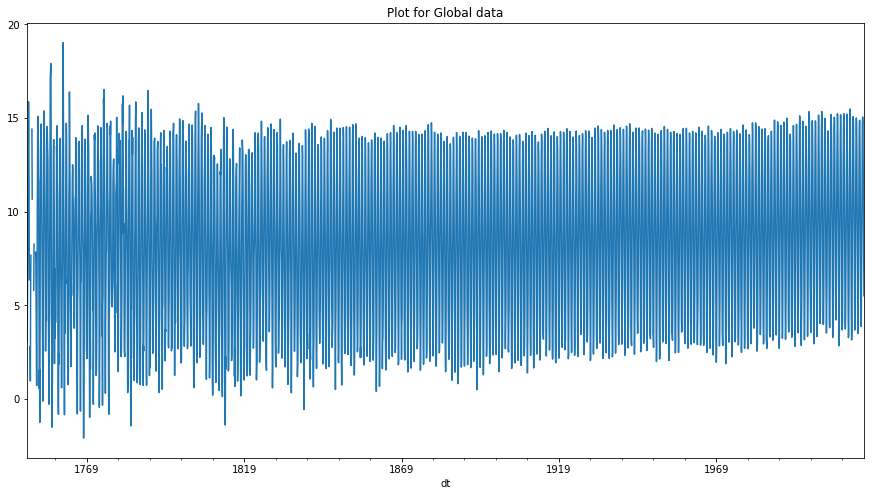

In [216]:
df_Global['LandAverageTemperature'].plot(figsize=(15,8), title='Plot for Global data')

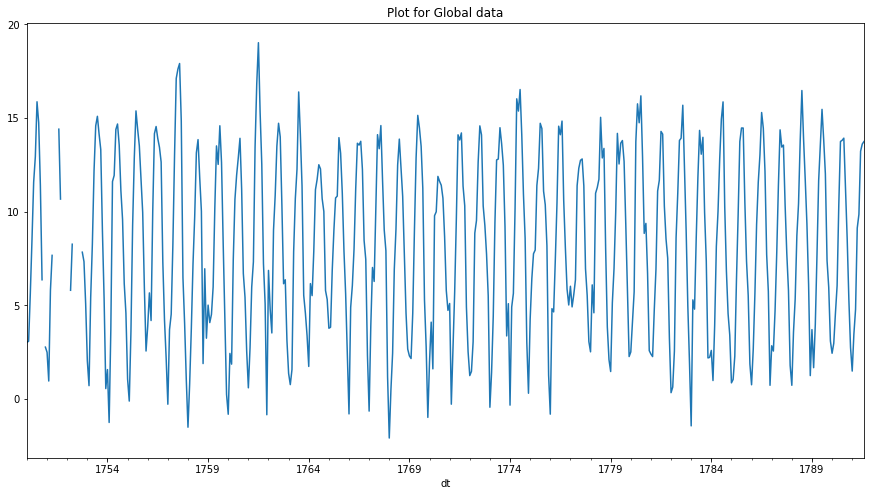

In [217]:
df_Global['LandAverageTemperature'].head(500).plot(figsize=(15,8), title='Plot for Global data')

LandAverageTemperature    0
Year                      0
Month                     0
dtype: int64


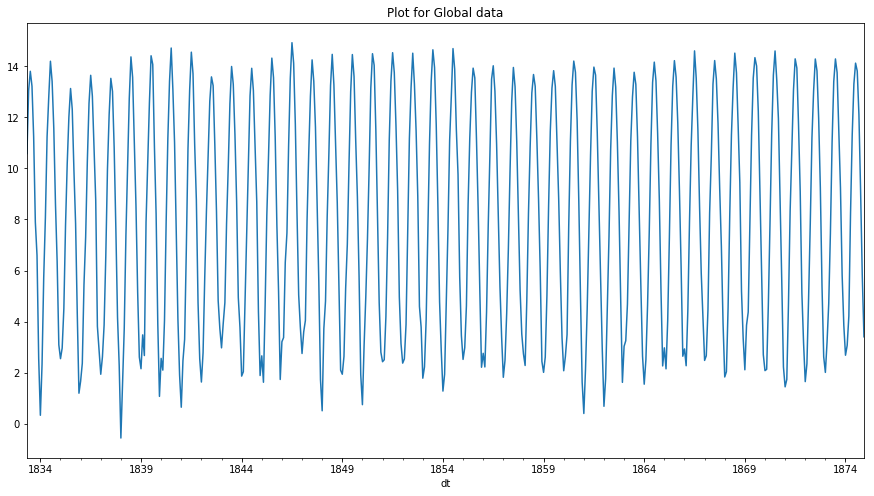

In [218]:
#Impute missing values by interpolate function
df_Global_interpolate = df_Global.copy()
df_Global_interpolate = df_Global_interpolate.interpolate()
df_Global_interpolate = df_Global_interpolate[1000:]
df_Global_interpolate.name = 'Global'
df_Global_interpolate['LandAverageTemperature'].head(500).plot(figsize=(15,8), title='Plot for Global data')
print(df_Global_interpolate.isna().sum())

In [219]:
df_Global_interpolate.head(5)

LandAverageTemperature  Year  Month
dt                                             
1833-05-01                  10.581  1833      5
1833-06-01                  13.049  1833      6
1833-07-01                  13.803  1833      7
1833-08-01                  13.222  1833      8
1833-09-01                  11.236  1833      9

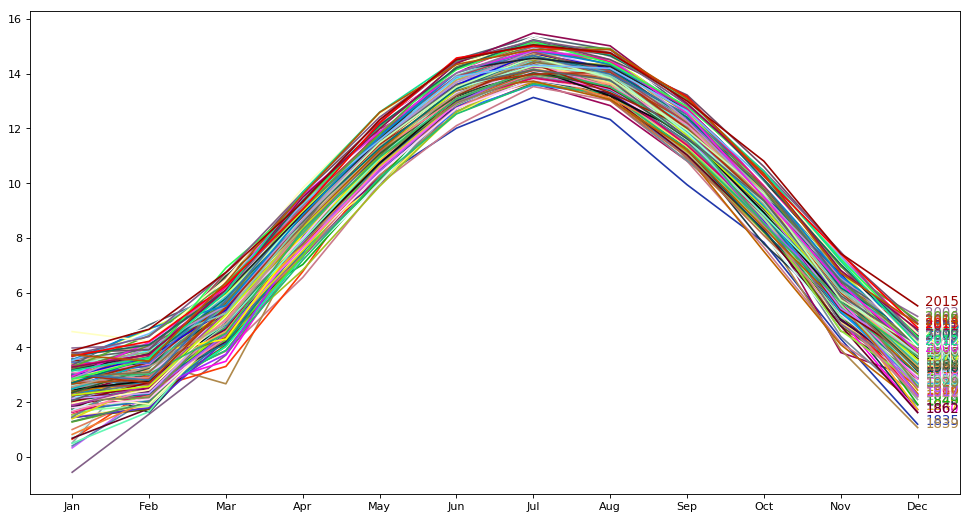

In [226]:
#Checking for seasonality. The plot below makes it clear that there is a strong seasonal pattern driven by months
years = df_Global_interpolate['Year'].unique()
df_Global_interpolate['MonthName'] = [d.strftime('%b') for d in df_Global_interpolate.index]
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(15,8), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('MonthName', 'LandAverageTemperature', data=df_Global_interpolate.loc[df_Global_interpolate.Year==y, :], color=mycolors[i], label=y)
        plt.text(df_Global_interpolate.loc[df_Global_interpolate.Year==y, :].shape[0]-.9, df_Global_interpolate.loc[df_Global_interpolate.Year==y, 'LandAverageTemperature'][-1:].values[0], y, fontsize=12, color=mycolors[i])

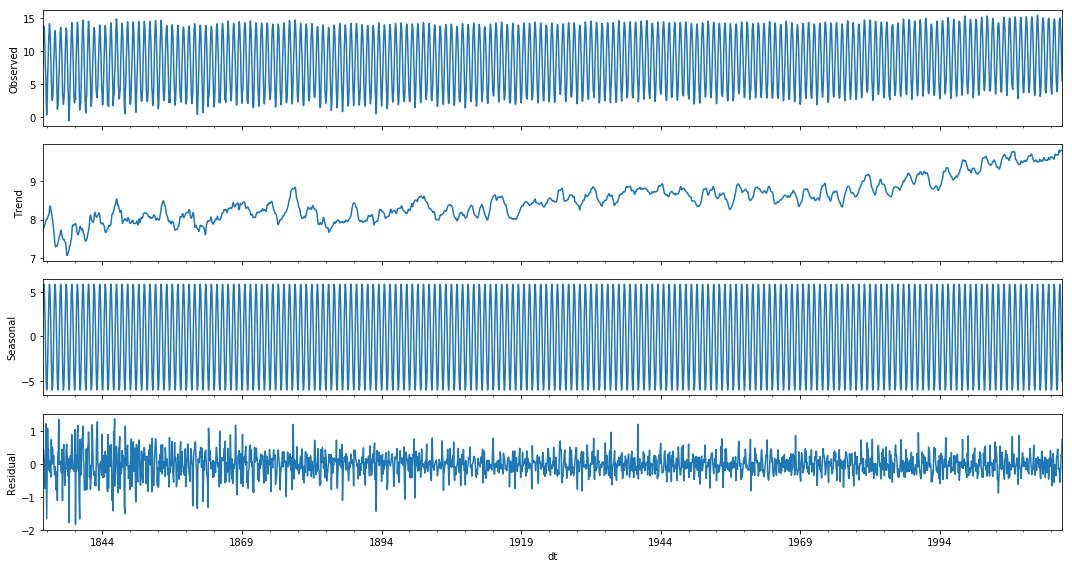

In [227]:
#Seasonal Decompose to check for trend and seasonality
df_Global_interpolate.drop(['Year','Month','MonthName'],axis=1,inplace=True)
decomposition_Global = seasonal_decompose(df_Global_interpolate, extrapolate_trend='freq', model='additive')

plt.rcParams.update({'figure.figsize': (15,8)})
fig = decomposition_Global.plot()
plt.show()

In [228]:
decomposition_Global.trend.head(5)

LandAverageTemperature
dt                                
1833-05-01                7.729145
1833-06-01                7.764167
1833-07-01                7.799190
1833-08-01                7.834212
1833-09-01                7.869235

In [191]:
#Function to test Stationarity in our timeseries dataset usinf Dickey Fuller
def test_stationarity(df, colName):
    #Determing rolling statistics
    rolmean = df[colName].rolling(12).mean() 
    rolstd = df[colName].rolling(12).std() 
    
    plt.plot(df[colName], color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[colName], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput,type(dfoutput))

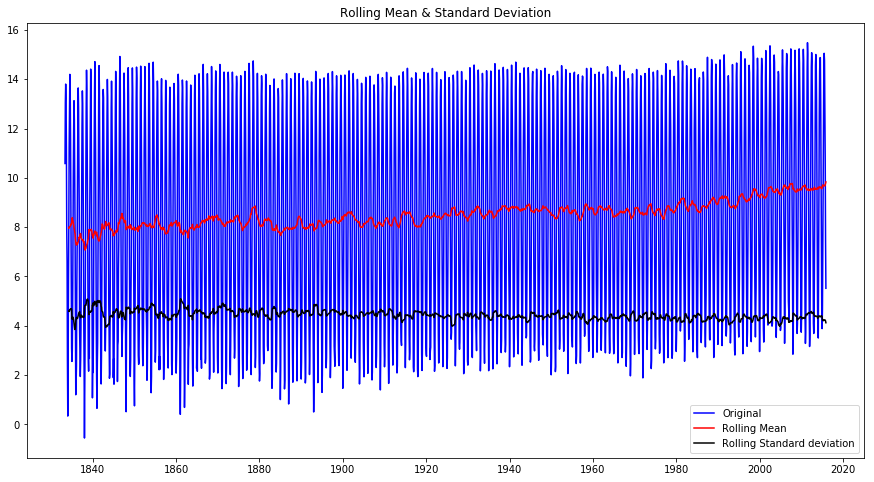

Results of Dickey-Fuller Test:
Test Statistic                   -1.275305
p-value                           0.640393
#Lags Used                       23.000000
Number of Observations Used    2168.000000
Critical Value (1%)              -3.433370
Critical Value (5%)              -2.862874
Critical Value (10%)             -2.567480
dtype: float64 <class 'pandas.core.series.Series'>


In [192]:
test_stationarity(df_Global_interpolate, 'LandAverageTemperature')

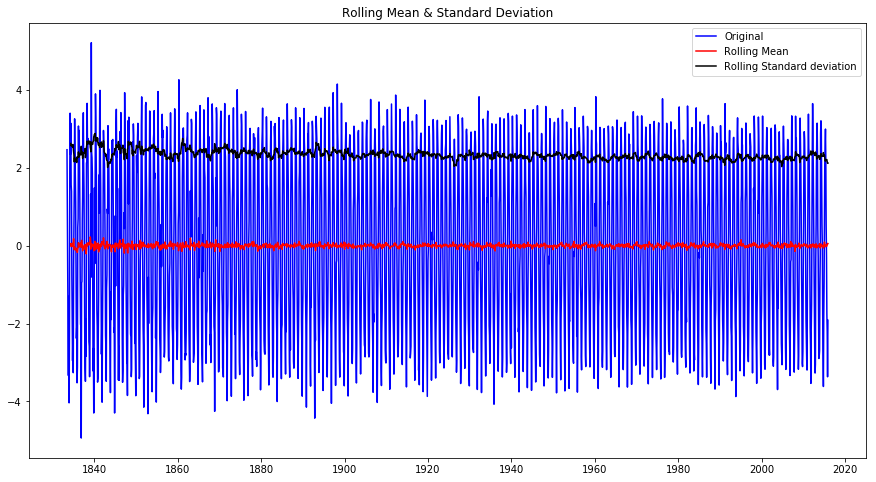

Results of Dickey-Fuller Test:
Test Statistic                -1.353654e+01
p-value                        2.561204e-25
#Lags Used                     2.600000e+01
Number of Observations Used    2.164000e+03
Critical Value (1%)           -3.433375e+00
Critical Value (5%)           -2.862877e+00
Critical Value (10%)          -2.567482e+00
dtype: float64 <class 'pandas.core.series.Series'>


In [193]:
#Since the null hypothesis that the data is stationary got rejected (test statistic greater than cv 5%), a difference of 1 is 
#applied and the stationarity test passed. 
df_Global_interpolate['stationary']=df_Global_interpolate['LandAverageTemperature'] - df_Global_interpolate['LandAverageTemperature'].shift()
test_stationarity(df_Global_interpolate.dropna(), 'stationary')

In [194]:
df_Global_interpolate.drop(['stationary'],1,inplace=True)

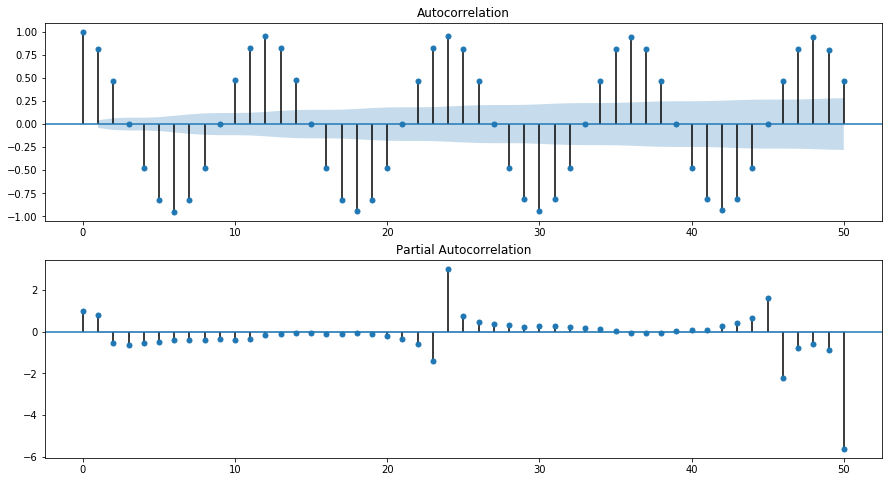

In [196]:
#ACF and PACF plots to identify AR and MA values
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(df_Global_interpolate.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(df_Global_interpolate.diff().dropna(), lags=50, ax=ax[1])
plt.show()

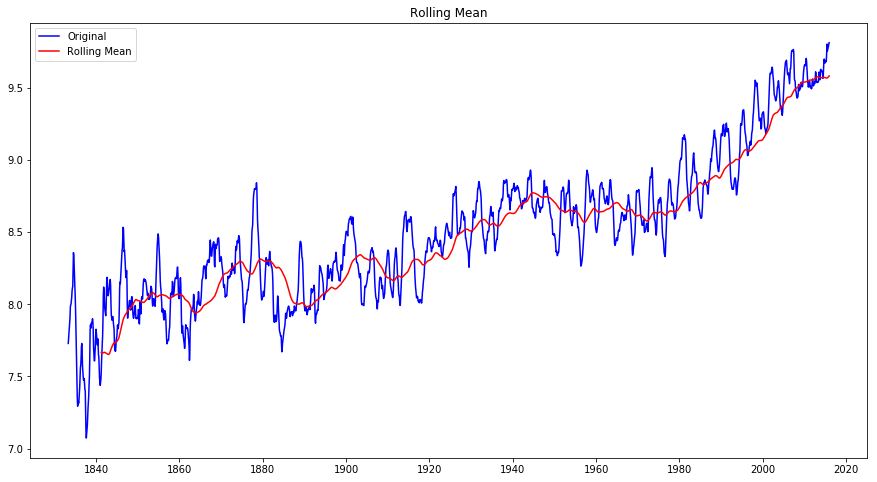

In [12]:
#from the seasonal decompose, trend is extracted and plotted. The pattern represents a sharp upward spike from late 1900s
global_trend = decomposition_Global.trend
rolmean = global_trend.rolling(96).mean() 
plt.plot(global_trend, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show()

In [239]:
#function to split the data and check for average temperatues for each timeframe. This is to identify if there are any unexpected spikes
def plot_trend(df,colname, displaystats=True):
    df_count = len(df)
    df_split = int(df_count/11)
    Avg_Temps = pd.Series()
    print('Split size in years: {}'.format(df_split/12))
    for i in range(0, df_count, df_split):
        if i+df_split < df_count:
            if displaystats:
                print("From {} to {} the avg temp is: {}".format(df.index[i], df.index[i+df_split], df[i:i+df_split][colname].mean()))
            Avg_Temps[df.index[i+df_split]] = df[i:i+df_split][colname].mean()
    Avg_Temps.plot(figsize=(12, 8)) 

Split size in years: 16.583333333333332
From 1833-05-01 00:00:00 to 1849-12-01 00:00:00 the avg temp is: 7.847368493106559
From 1849-12-01 00:00:00 to 1866-07-01 00:00:00 the avg temp is: 8.024422110552765
From 1866-07-01 00:00:00 to 1883-02-01 00:00:00 the avg temp is: 8.276411222780569
From 1883-02-01 00:00:00 to 1899-09-01 00:00:00 the avg temp is: 8.076442211055276
From 1899-09-01 00:00:00 to 1916-04-01 00:00:00 the avg temp is: 8.294780778894472
From 1916-04-01 00:00:00 to 1932-11-01 00:00:00 the avg temp is: 8.454172110552763
From 1932-11-01 00:00:00 to 1949-06-01 00:00:00 the avg temp is: 8.688087939698491
From 1949-06-01 00:00:00 to 1966-01-01 00:00:00 the avg temp is: 8.631375
From 1966-01-01 00:00:00 to 1982-08-01 00:00:00 the avg temp is: 8.692487227805694
From 1982-08-01 00:00:00 to 1999-03-01 00:00:00 the avg temp is: 9.032353852596314
From 1999-03-01 00:00:00 to 2015-10-01 00:00:00 the avg temp is: 9.521681165881857


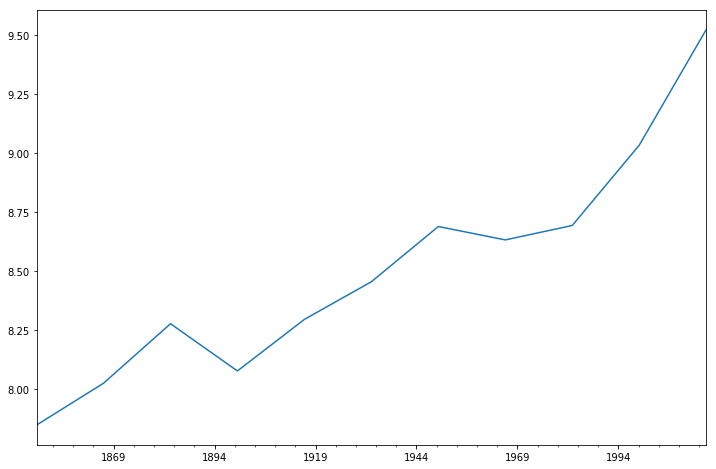

In [240]:
plot_trend(global_trend,'LandAverageTemperature')

Split size in years: 16.583333333333332
From 1833-05-01 00:00:00 to 1849-12-01 00:00:00 the avg temp is: 7.957231155778895
From 1849-12-01 00:00:00 to 1866-07-01 00:00:00 the avg temp is: 7.953120603015075
From 1866-07-01 00:00:00 to 1883-02-01 00:00:00 the avg temp is: 8.284065326633165
From 1883-02-01 00:00:00 to 1899-09-01 00:00:00 the avg temp is: 8.124788944723619
From 1899-09-01 00:00:00 to 1916-04-01 00:00:00 the avg temp is: 8.206155778894473
From 1916-04-01 00:00:00 to 1932-11-01 00:00:00 the avg temp is: 8.568356783919599
From 1932-11-01 00:00:00 to 1949-06-01 00:00:00 the avg temp is: 8.585206030150754
From 1949-06-01 00:00:00 to 1966-01-01 00:00:00 the avg temp is: 8.692854271356783
From 1966-01-01 00:00:00 to 1982-08-01 00:00:00 the avg temp is: 8.683452261306533
From 1982-08-01 00:00:00 to 1999-03-01 00:00:00 the avg temp is: 8.988688442211055
From 1999-03-01 00:00:00 to 2015-10-01 00:00:00 the avg temp is: 9.60559296482412


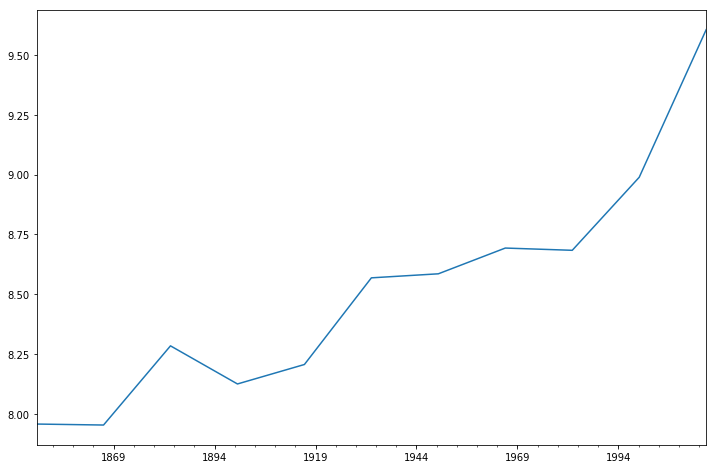

In [230]:
#Trend plot for the actual data
plot_trend(df_Global_interpolate,'LandAverageTemperature')

In [200]:
#Using the values for AR, I and MA (p,d,q), this function fine tunes the seasonal parameters
def SARIMAX_Tuning(dfs):
    p = d = q = range(0, 2)
    #pdq = list(itertools.product(p, d, q))
    pdq = [(1,1,2)]
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    list_rows = []
    for dataset in (dfs):
        for param in pdq:
            for param_seasonal in seasonal_pdq:
                mod = sm.tsa.statespace.SARIMAX(dataset,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

                results = mod.fit()
                list_rows.append((dataset.name, results.aic, param, param_seasonal))
                
    df_SARIMAX_params = pd.DataFrame(list_rows, columns = ['Country', 'AIC', 'param', 'param_seasonal'])
    return df_SARIMAX_params

In [201]:
#2 time series models have been used: SARIMA and Triple Exponential Smoothing. CV has been implemented with 4 splits
def TimeSeries_Models(df, model_name, param_df="", plot_intervals=False):
    tscv = TimeSeriesSplit(n_splits=4)
    rmse = []
    print('\033[1m' + 'Dataframe region: ' + df.name + ', Model: ' + model_name)
    for train_index, test_index in tscv.split(df):
        cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
        if model_name == 'sarimax':
            i = [param_df[param_df['AIC'] == param_df['AIC'].min()].index][0]
            param_order = param_df.loc[i,'param'].values[0]
            param_seasonal_order = param_df.loc[i,'param_seasonal'].values[0]
            model = SARIMAX(cv_train,order=param_order,seasonal_order=param_seasonal_order,
                                 enforce_stationarity=False, enforce_invertibility=False).fit()
        elif model_name == 'Exponential Smoothing':
            model = ExponentialSmoothing(cv_train, seasonal='add', seasonal_periods=12).fit()
        predictions = model.predict(cv_test.index.values[0], cv_test.index.values[-1])
        true_values = cv_test.values
        print("R^2: {}".format(r2_score(true_values, predictions)))
        rmse.append(sqrt(mean_squared_error(true_values, predictions)))
        
        if plot_intervals or df.name=='India':
            compare_df_model = pd.concat([cv_test,predictions], axis=1).rename(columns={'AverageTemperature': 'actual', 0:'predicted'})
            fig = plt.figure()
            ax1 = fig.add_subplot(121)
            ax2 = fig.add_subplot(122)
            compare_df_model.plot(ax=ax1,figsize=(15,4))
            cv_train.plot(ax=ax2,figsize=(15,4))
    print("RMSE: {}".format(np.mean(rmse)))

Dataframe region: Global, Model: sarimax
R^2: 0.9758121956345012
R^2: 0.9929685398917556
R^2: 0.9839162348376863
R^2: 0.9709372198223543
RMSE: 0.5663038452289264


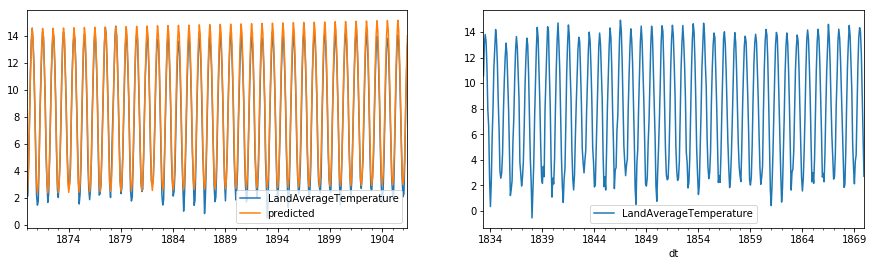

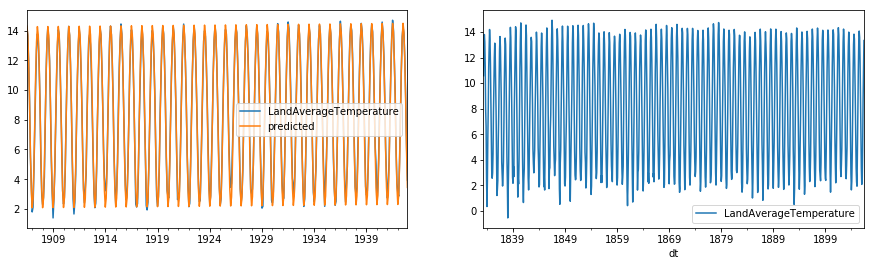

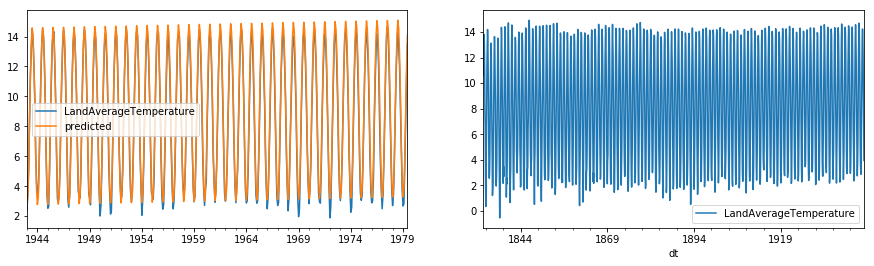

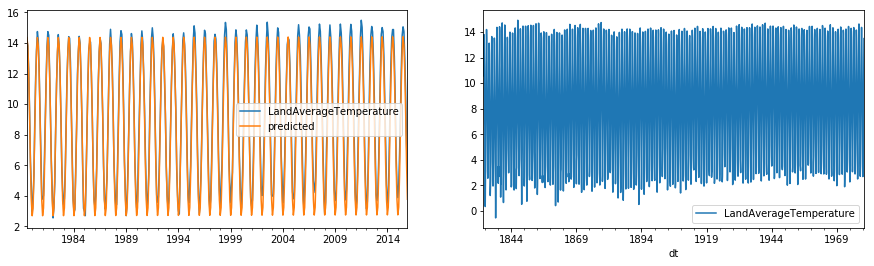

In [202]:
#Checking for SARIMAX output
param_df = SARIMAX_Tuning([df_Global_interpolate])
TimeSeries_Models(df_Global_interpolate, 'sarimax', param_df, True)

In [179]:
param_df

Country          AIC      param param_seasonal
0  Global  3142.591299  (4, 2, 2)  (0, 0, 0, 12)
1  Global  3047.588455  (4, 2, 2)  (0, 0, 1, 12)
2  Global  3353.779280  (4, 2, 2)  (0, 1, 0, 12)
3  Global  1903.462454  (4, 2, 2)  (0, 1, 1, 12)
4  Global  3201.327901  (4, 2, 2)  (1, 0, 0, 12)
5  Global  2245.838473  (4, 2, 2)  (1, 0, 1, 12)
6  Global  2524.253138  (4, 2, 2)  (1, 1, 0, 12)
7  Global  1958.024144  (4, 2, 2)  (1, 1, 1, 12)

Dataframe region: Global, Model: Exponential Smoothing
R^2: 0.9880827891363677
R^2: 0.9913804584347111
R^2: 0.993896096871664
R^2: 0.9672757299413607
RMSE: 0.48528819512024435


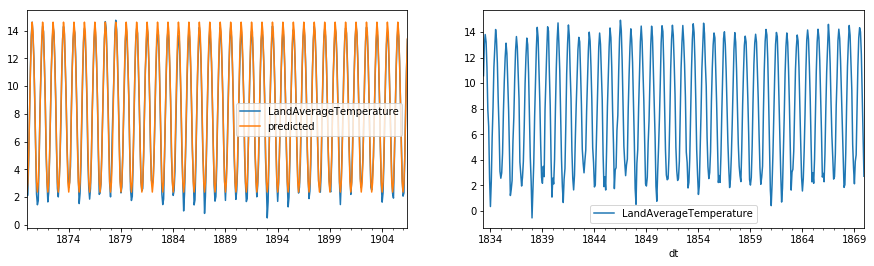

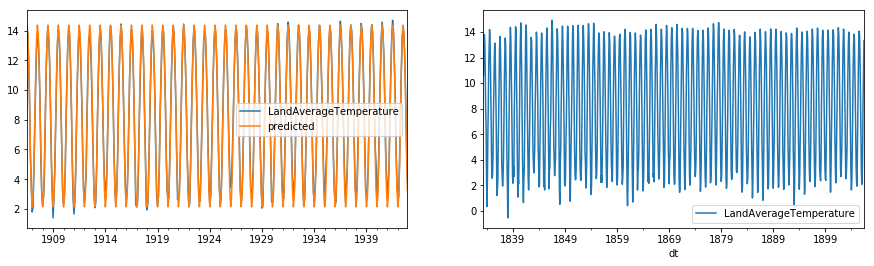

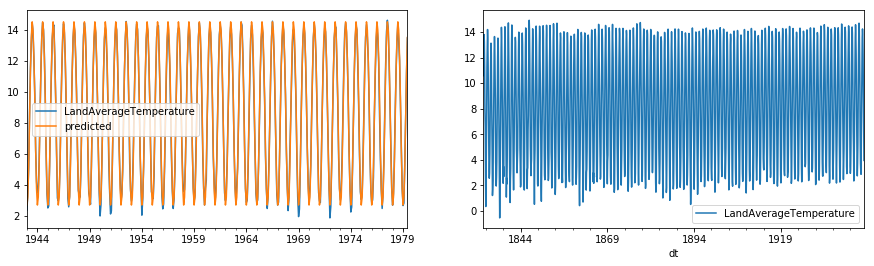

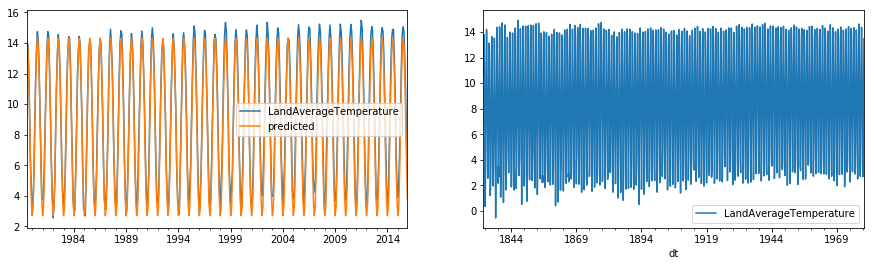

In [17]:
#Checking for Exponential Smoothing output
TimeSeries_Models(df_Global_interpolate, 'Exponential Smoothing', plot_intervals=True)

In [21]:
#Feature Engineering for Supervised learning models
df_Global_interpolate_Features = df_Global_interpolate.copy()
df_Global_interpolate_Features['Year'], df_Global_interpolate_Features['Month'] = df_Global_interpolate_Features.index.year, df_Global_interpolate_Features.index.month
#df_Global_interpolate_Features['LandAverageTemperature-1'] = df_Global_interpolate_Features['LandAverageTemperature'].shift(-1)
df_Global_interpolate_Features['LandAverageTemperature+1'] = df_Global_interpolate_Features['LandAverageTemperature'].shift(1)
df_Global_interpolate_Features['LandAverageTemperature_LastYear'] = df_Global_interpolate_Features['LandAverageTemperature'].shift(12)
df_Global_interpolate_Features.dropna(inplace=True)
df_Global_interpolate_Features.name = 'Global Data'
df_Global_interpolate_Features.tail(5)

LandAverageTemperature  Year  Month  LandAverageTemperature+1  \
dt                                                                          
2015-08-01                  14.755  2015      8                    15.051   
2015-09-01                  12.999  2015      9                    14.755   
2015-10-01                  10.801  2015     10                    12.999   
2015-11-01                   7.433  2015     11                    10.801   
2015-12-01                   5.518  2015     12                     7.433   

            LandAverageTemperature_LastYear  
dt                                           
2015-08-01                           14.875  
2015-09-01                           13.091  
2015-10-01                           10.330  
2015-11-01                            6.713  
2015-12-01                            4.850

In [22]:
#Supervised Learning models: Linear Regression and Random Forest Regressor have been used (fast compared to time series models)
def SupervisedLearning_Models(df, ColName, model, model_name, plot_intervals=False):
    tscv = TimeSeriesSplit(n_splits=4)
    rmse = []
    print('\033[1m' + 'Dataframe region: ' + df.name + ', Model: ' + model_name)
    for train_index, test_index in tscv.split(df):
        cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
        model.fit(cv_train.drop([ColName],1), cv_train[ColName])
        predictions = pd.Series(lr.predict(cv_test.drop([ColName],1)))
        predictions.index=cv_test.index
        true_values = cv_test[ColName].values
        print("R^2: {}".format(r2_score(true_values, predictions)))
        compare_df_lr = pd.concat(
        [cv_test[ColName],
        predictions], axis=1).rename(
        columns={ColName: 'actual', 0:'predicted'})

        fig = plt.figure()
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        compare_df_lr.plot(ax=ax1,figsize=(15,4))
        cv_train[ColName].plot(ax=ax2,figsize=(15,4))
    
        rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
    print("RMSE: {}".format(np.mean(rmse)))

Dataframe region: Global Data, Model: Linear Regression
R^2: 0.9872555156683726
R^2: 0.9892581219130826
R^2: 0.9888022507289276
R^2: 0.9884605682617462
RMSE: 0.4535108729835928


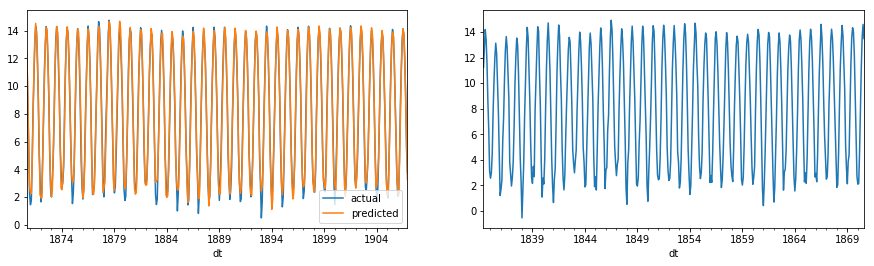

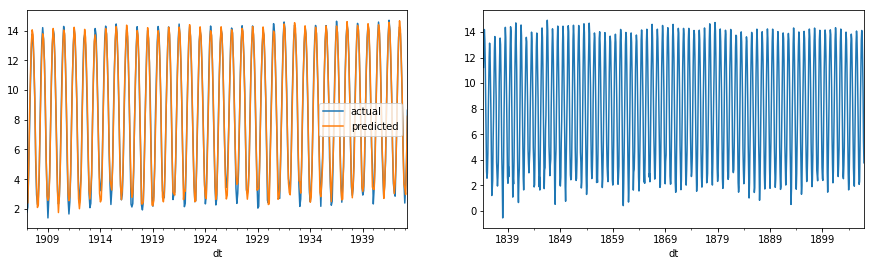

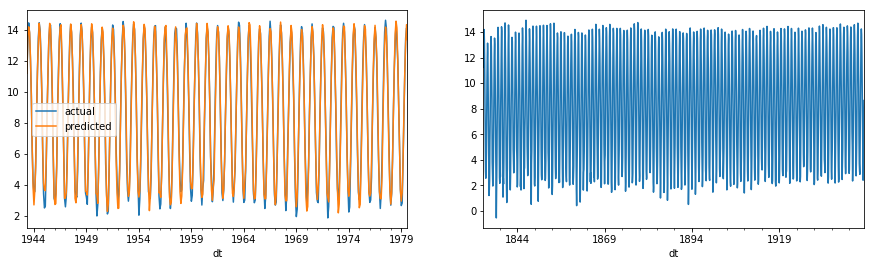

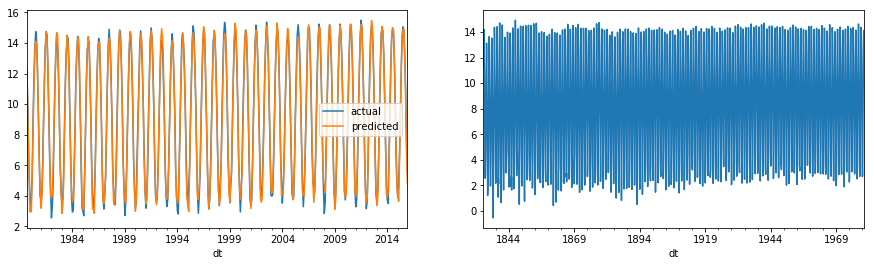

In [23]:
##Checking for Exponential Smoothing Linear Regression output
lr = linear_model.LinearRegression()
SupervisedLearning_Models(df_Global_interpolate_Features, 'LandAverageTemperature', lr, 'Linear Regression', plot_intervals=True)

In [24]:
# Hyperparameter tuning for Random Forest Regressor model
global_param_test1 = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2)}

global_gsearch1 = GridSearchCV(estimator = RandomForestRegressor(min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',random_state=10), 
param_grid = global_param_test1, n_jobs=4,iid=False, cv=5)
global_gsearch1.fit(df_Global_interpolate_Features.drop(['LandAverageTemperature'],1), df_Global_interpolate_Features['LandAverageTemperature'])
#gsearch1.cv_results_, 
global_gsearch1.best_params_, global_gsearch1.best_score_

({'max_depth': 5, 'n_estimators': 50}, 0.9361938876649237)

In [27]:
global_param_test2 = {'min_samples_split':range(2,1000,200), 'min_samples_leaf':range(30,71,10)}

global_gsearch2 = GridSearchCV(estimator = RandomForestRegressor(n_estimators = 50, max_depth=5, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',random_state=10), 
param_grid = global_param_test2, n_jobs=4,iid=False, cv=5)
global_gsearch2.fit(df_Global_interpolate_Features.drop(['LandAverageTemperature'],1), df_Global_interpolate_Features['LandAverageTemperature'])
#gsearch1.cv_results_, 
global_gsearch2.best_params_, global_gsearch2.best_score_

({'min_samples_leaf': 30, 'min_samples_split': 2}, 0.9863924411193468)

In [28]:
global_param_test3 = {'max_features':range(1,4,1)}

global_gsearch3 = GridSearchCV(estimator = RandomForestRegressor(n_estimators = 50, max_depth=5, min_samples_split=2,min_samples_leaf=30,max_features='sqrt',random_state=10), 
param_grid = global_param_test3, n_jobs=4,iid=False, cv=5)
global_gsearch3.fit(df_Global_interpolate_Features.drop(['LandAverageTemperature'],1), df_Global_interpolate_Features['LandAverageTemperature'])
#gsearch1.cv_results_, 
global_gsearch3.best_params_, global_gsearch3.best_score_

({'max_features': 2}, 0.9863924411193468)

Dataframe region: Global Data, Model: Random Forest Regressor
R^2: 0.9878862778124722
R^2: 0.989377002788747
R^2: 0.988839422268007
R^2: 0.9884605682617462
RMSE: 0.4496486613599799


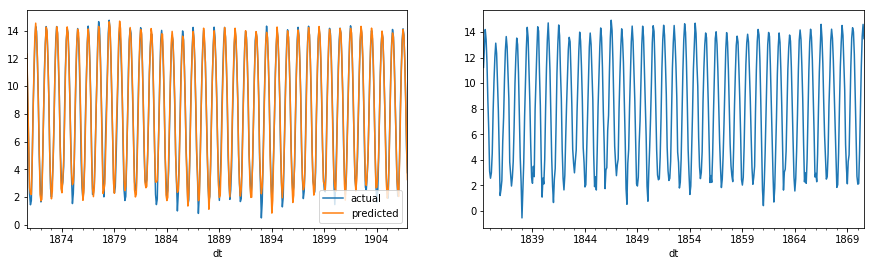

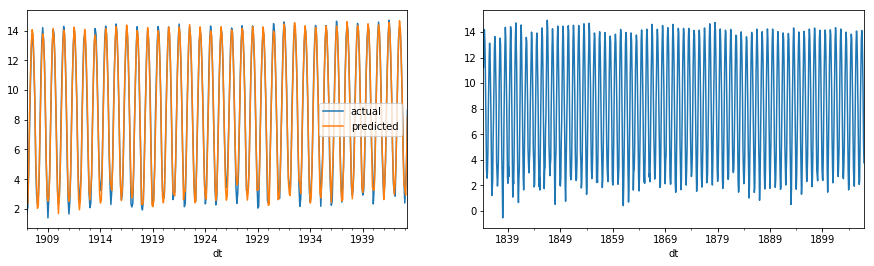

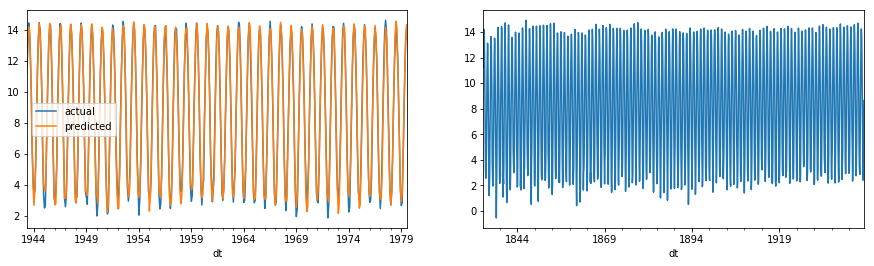

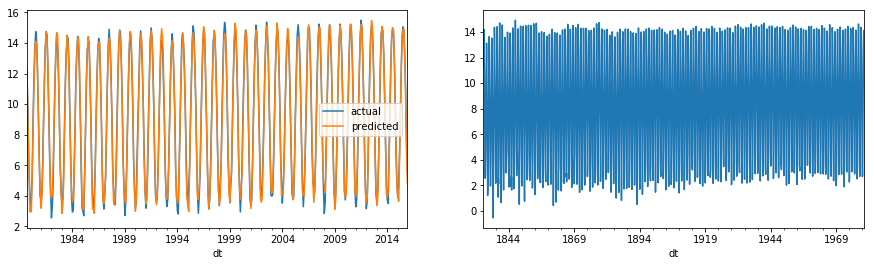

In [29]:
#Checking for Random Forest Regressor output
rf = RandomForestRegressor(n_estimators = 50, max_depth=5, min_samples_split=2,min_samples_leaf=30,max_features=2,random_state=10)
SupervisedLearning_Models(df_Global_interpolate_Features, 'LandAverageTemperature', rf, 'Random Forest Regressor', plot_intervals=True)

<b>Of all the models, Exponential Smoothing from time series models and Random Forest Regressor from Supervised Learning gave better results (higher R^2 and lower RMSE)</b>

In [129]:
#Forecasting with Random Forest Regression
start = datetime.datetime.strptime("2016-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,800)]
future = pd.DataFrame(index=date_list, columns= df_Global_interpolate_Features.columns)
df_Global_interpolate_future = pd.concat([df_Global_interpolate_Features, future])

df_Global_interpolate_future['Year'], df_Global_interpolate_future['Month'] = df_Global_interpolate_future.index.year, df_Global_interpolate_future.index.month
#df_Global_interpolate_Features['LandAverageTemperature+1'] = df_Global_interpolate_Features['LandAverageTemperature'].shift(1)
#df_Global_interpolate_Features['LandAverageTemperature_LastYear'] = df_Global_interpolate_Features['LandAverageTemperature'].shift(12)

df_Global_interpolate_future

LandAverageTemperature  Year  Month  LandAverageTemperature+1  \
1834-05-01                  11.234  1834      5                     8.085   
1834-06-01                  12.799  1834      6                    11.234   
1834-07-01                  14.197  1834      7                    12.799   
1834-08-01                  13.412  1834      8                    14.197   
1834-09-01                  11.571  1834      9                    13.412   
1834-10-01                   8.617  1834     10                    11.571   
1834-11-01                   6.355  1834     11                     8.617   
1834-12-01                   3.092  1834     12                     6.355   
1835-01-01                   2.551  1835      1                     3.092   
1835-02-01                   2.967  1835      2                     2.551   
1835-03-01                   4.507  1835      3                     2.967   
1835-04-01                   7.769  1835      4                     4.507   
1835-05-01                  10.171  1835      5                     7.769   
1835-06-01                  12.007  1835      6                    10.171   
1835-07-01                  13.129  1835      7                    12.007   
1835-08-01                  12.322  1835      8                    13.129   
1835-09-01                   9.942  1835      9                    12.322   
1835-10-01                   7.835  1835     10                     9.942   
1835-11-01                   4.312  1835     11                     7.835   
1835-12-01                   1.198  1835     12                     4.312   
1836-01-01                   1.670  1836      1                     1.198   
1836-02-01                   2.371  1836      2                     1.670   
1836-03-01                   5.448  1836      3                     2.371   
1836-04-01                   7.315  1836      4                     5.448   
1836-05-01                  10.279  1836      5                     7.315   
1836-06-01                  12.549  1836      6                    10.279   
1836-07-01                  13.646  1836      7                    12.549   
1836-08-01                  12.830  1836      8                    13.646   
1836-09-01                  10.812  1836      9                    12.830   
1836-10-01                   8.756  1836     10                    10.812   
1836-11-01                   3.814  1836     11                     8.756   
1836-12-01                   2.860  1836     12                     3.814   
1837-01-01                   1.940  1837      1                     2.860   
1837-02-01                   2.619  1837      2                     1.940   
1837-03-01                   3.865  1837      3                     2.619   
1837-04-01                   6.556  1837      4                     3.865   
1837-05-01                   9.973  1837      5                     6.556   
1837-06-01                  12.099  1837      6                     9.973   
1837-07-01                  13.526  1837      7                    12.099   
1837-08-01                  13.018  1837      8                    13.526   
1837-09-01                  10.805  1837      9                    13.018   
1837-10-01                   7.653  1837     10                    10.805   
1837-11-01                   4.169  1837     11                     7.653   
1837-12-01                   2.285  1837     12                     4.169   
1838-01-01                  -0.557  1838      1                     2.285   
1838-02-01                   1.563  1838      2                    -0.557   
1838-03-01                   3.723  1838      3                     1.563   
1838-04-01                   7.383  1838      4                     3.723   
1838-05-01                   9.985  1838      5                     7.383   
1838-06-01                  12.742  1838      6                     9.985   
1838-07-01                  14.367  1838      7                    12.742   
1838-08-

In [130]:
#Function to forecast temperatures using Random Forest
def RandomForestForecast(model):
    for index, row in df_Global_interpolate_future[~df_Global_interpolate_future.LandAverageTemperature.notnull()].iterrows():
        df_Global_interpolate_future.loc[index,'LandAverageTemperature+1'] = df_Global_interpolate_future.loc[index + pd.DateOffset(months=-1),'LandAverageTemperature']
        df_Global_interpolate_future.loc[index,'LandAverageTemperature_LastYear'] = df_Global_interpolate_future.loc[index + pd.DateOffset(months=-12),'LandAverageTemperature']
        row_val = df_Global_interpolate_future.loc[index, df_Global_interpolate_future.columns != 'LandAverageTemperature']
        pred = model.predict(row_val.values.reshape(1, -1))
        df_Global_interpolate_future.loc[index,'LandAverageTemperature'] = pred

In [131]:
rf = RandomForestRegressor(n_estimators = 40, max_depth=5, min_samples_split=2,min_samples_leaf=40,max_features=2,random_state=10)
#train, test = np.split(df_Global_interpolate_Features, [int(.67 *len(df_Global_interpolate_Features))])
rf.fit(df_Global_interpolate_Features.drop(['LandAverageTemperature'],1), df_Global_interpolate_Features['LandAverageTemperature'])
RandomForestForecast(rf)

In [133]:
#Function to plot future trends
def plot_trend(df,colname):
    df_count = len(df)
    df_split = int(df_count/11)
    Avg_Temps = pd.Series()
    print('Split size in years: {}'.format(df_split/12))
    for i in range(0, df_count, df_split):
        if i+df_split < df_count:
            print("From {} to {} the avg temp is: {}".format(df.index[i], df.index[i+df_split], df[i:i+df_split][colname].mean()))
            Avg_Temps[df.index[i+df_split]] = df[i:i+df_split][colname].mean()
    Avg_Temps.plot(figsize=(12, 8)) 

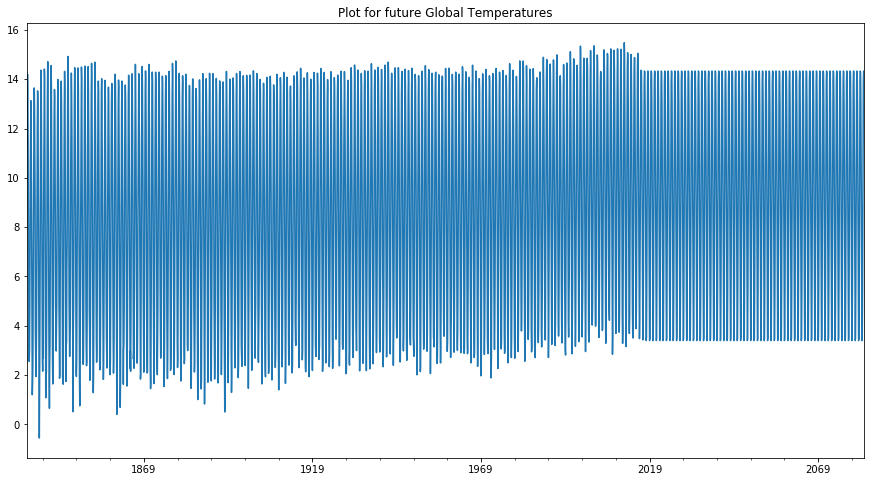

In [132]:
df_Global_interpolate_future['LandAverageTemperature'].plot(figsize=(15,8), title='Plot for future Global Temperatures')

Split size in years: 22.5
From 1834-05-01 00:00:00 to 1856-11-01 00:00:00 the avg temp is: 7.9989
From 1856-11-01 00:00:00 to 1879-05-01 00:00:00 the avg temp is: 8.087466666666666
From 1879-05-01 00:00:00 to 1901-11-01 00:00:00 the avg temp is: 8.219007407407409
From 1901-11-01 00:00:00 to 1924-05-01 00:00:00 the avg temp is: 8.196503703703705
From 1924-05-01 00:00:00 to 1946-11-01 00:00:00 the avg temp is: 8.728025925925927
From 1946-11-01 00:00:00 to 1969-05-01 00:00:00 the avg temp is: 8.549603703703704
From 1969-05-01 00:00:00 to 1991-11-01 00:00:00 the avg temp is: 8.903218518518518
From 1991-11-01 00:00:00 to 2014-05-01 00:00:00 the avg temp is: 9.298588888888888
From 2014-05-01 00:00:00 to 2036-11-01 00:00:00 the avg temp is: 9.383040401883004
From 2036-11-01 00:00:00 to 2059-05-01 00:00:00 the avg temp is: 9.172613786820907
From 2059-05-01 00:00:00 to 2081-11-01 00:00:00 the avg temp is: 9.339286309050257


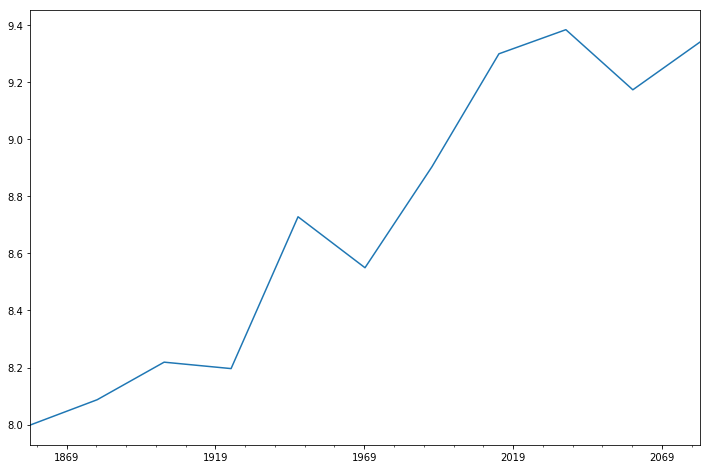

In [134]:
# Future trend with Random Forest Regressor
plot_trend(df_Global_interpolate_future,'LandAverageTemperature')

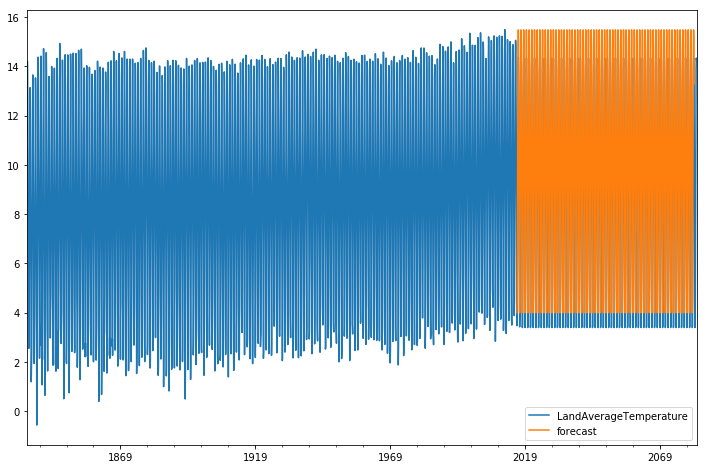

In [206]:
# Future prediction with Exponential Smoothing
es = ExponentialSmoothing(df_Global_interpolate, seasonal='add', seasonal_periods=12).fit()
df_Global_interpolate_future['forecast'] = es.predict(start = 2192, end = 2980)  
df_Global_interpolate_future[['LandAverageTemperature', 'forecast']].ix[-3500:].plot(figsize=(12, 8)) 

Split size in years: 22.5
From 1834-05-01 00:00:00 to 1856-11-01 00:00:00 the avg temp is: 7.9989
From 1856-11-01 00:00:00 to 1879-05-01 00:00:00 the avg temp is: 8.087466666666666
From 1879-05-01 00:00:00 to 1901-11-01 00:00:00 the avg temp is: 8.219007407407409
From 1901-11-01 00:00:00 to 1924-05-01 00:00:00 the avg temp is: 8.196503703703705
From 1924-05-01 00:00:00 to 1946-11-01 00:00:00 the avg temp is: 8.728025925925927
From 1946-11-01 00:00:00 to 1969-05-01 00:00:00 the avg temp is: 8.549603703703704
From 1969-05-01 00:00:00 to 1991-11-01 00:00:00 the avg temp is: 8.903218518518518
From 1991-11-01 00:00:00 to 2014-05-01 00:00:00 the avg temp is: 9.298588888888888
From 2014-05-01 00:00:00 to 2036-11-01 00:00:00 the avg temp is: 9.985280711743682
From 2036-11-01 00:00:00 to 2059-05-01 00:00:00 the avg temp is: 9.83338677039865
From 2059-05-01 00:00:00 to 2081-11-01 00:00:00 the avg temp is: 9.997341173462512


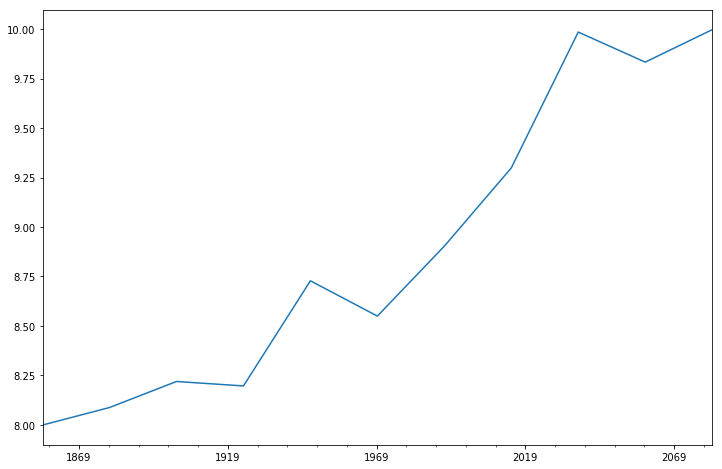

In [208]:
# Future trend with Exponential Smoothing
df_Global_interpolate_future['forecast'].fillna(df_Global_interpolate_future['LandAverageTemperature'], inplace=True)
plot_trend(df_Global_interpolate_future,'forecast')

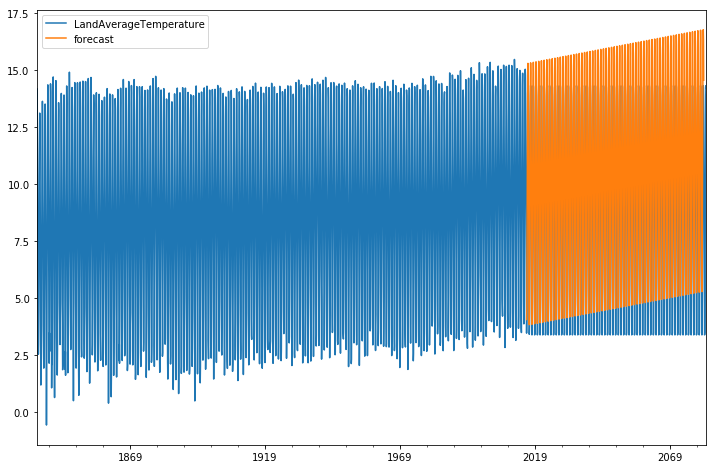

In [144]:
#Future prediction with SARIMAX
sarima = SARIMAX(df_Global_interpolate,order=(4,2,2),seasonal_order=(1,1,1,12),
                                 enforce_stationarity=False, enforce_invertibility=False).fit()
#print(sarima.predict(start = 2192, end = 2492, dynamic= True))
df_Global_interpolate_future['forecast'] = sarima.predict(start = 2192, end = 2980, dynamic= True)  
df_Global_interpolate_future[['LandAverageTemperature', 'forecast']].ix[-3500:].plot(figsize=(12, 8)) 

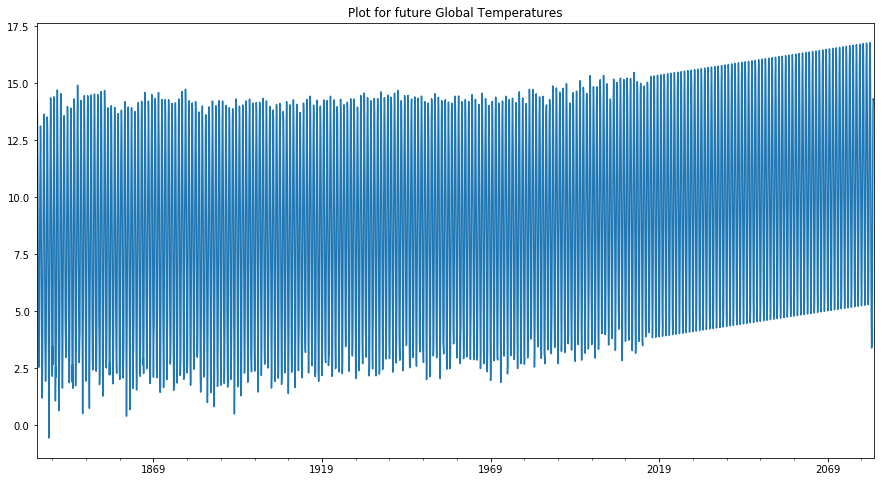

In [146]:
df_Global_interpolate_future['forecast'].fillna(df_Global_interpolate_future['LandAverageTemperature'], inplace=True)
df_Global_interpolate_future['forecast'].plot(figsize=(15,8), title='Plot for future Global Temperatures')

Split size in years: 22.5
From 1834-05-01 00:00:00 to 1856-11-01 00:00:00 the avg temp is: 7.9989
From 1856-11-01 00:00:00 to 1879-05-01 00:00:00 the avg temp is: 8.087466666666666
From 1879-05-01 00:00:00 to 1901-11-01 00:00:00 the avg temp is: 8.219007407407409
From 1901-11-01 00:00:00 to 1924-05-01 00:00:00 the avg temp is: 8.196503703703705
From 1924-05-01 00:00:00 to 1946-11-01 00:00:00 the avg temp is: 8.728025925925927
From 1946-11-01 00:00:00 to 1969-05-01 00:00:00 the avg temp is: 8.549603703703704
From 1969-05-01 00:00:00 to 1991-11-01 00:00:00 the avg temp is: 8.903218518518518
From 1991-11-01 00:00:00 to 2014-05-01 00:00:00 the avg temp is: 9.298588888888888
From 2014-05-01 00:00:00 to 2036-11-01 00:00:00 the avg temp is: 10.029452140883352
From 2036-11-01 00:00:00 to 2059-05-01 00:00:00 the avg temp is: 10.371198722931402
From 2059-05-01 00:00:00 to 2081-11-01 00:00:00 the avg temp is: 11.0417929596248


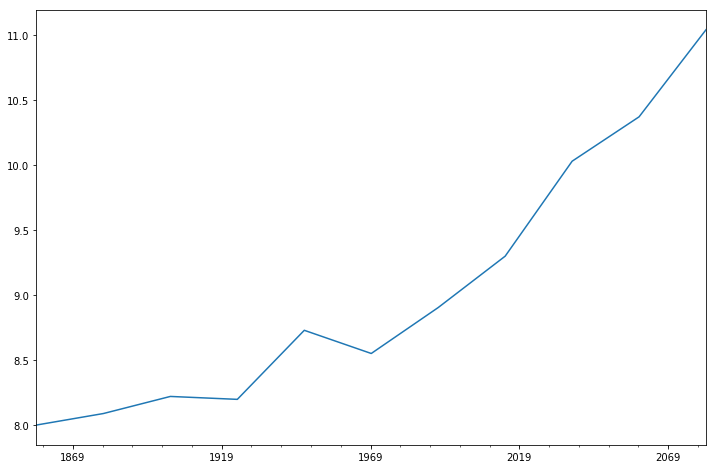

In [147]:
#Future trend with SARIMA
plot_trend(df_Global_interpolate_future,'forecast')

<br/><b>The above study strongly indicates a recent sudden rise in temperatures and the forecast supports this trend.</b> <br/><br/>
<h2>Goal 2: If there is an unusual temperature pattern for one or more countries that can provide us with more insights about human intervention</h2>

In [231]:
# GlobalLandTemperaturesByCountry dataset has been used for countrywise study
df_country = pd.DataFrame()
df_country = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\Time Series datasets\Climate Change\GlobalLandTemperaturesByCountry.csv")

df_country['dt'] = pd.to_datetime(df_country.dt)
df_country['Year'], df_country['Month'] = df_country['dt'].dt.year, df_country['dt'].dt.month
df_country.head(100)

dt  AverageTemperature  AverageTemperatureUncertainty Country  \
0  1743-11-01               4.384                          2.294   Åland   
1  1743-12-01                 NaN                            NaN   Åland   
2  1744-01-01                 NaN                            NaN   Åland   
3  1744-02-01                 NaN                            NaN   Åland   
4  1744-03-01                 NaN                            NaN   Åland   
5  1744-04-01               1.530                          4.680   Åland   
6  1744-05-01               6.702                          1.789   Åland   
7  1744-06-01              11.609                          1.577   Åland   
8  1744-07-01              15.342                          1.410   Åland   
9  1744-08-01                 NaN                            NaN   Åland   
10 1744-09-01              11.702                          1.517   Åland   
11 1744-10-01               5.477                          1.862   Åland   
12 1744-11-01               3.407                          1.425   Åland   
13 1744-12-01              -2.181                          1.641   Åland   
14 1745-01-01              -3.850                          1.841   Åland   
15 1745-02-01              -6.575                          1.360   Åland   
16 1745-03-01              -4.195                          1.213   Åland   
17 1745-04-01              -0.966                          1.172   Åland   
18 1745-05-01                 NaN                            NaN   Åland   
19 1745-06-01                 NaN                            NaN   Åland   
20 1745-07-01                 NaN                            NaN   Åland   
21 1745-08-01                 NaN                            NaN   Åland   
22 1745-09-01                 NaN                            NaN   Åland   
23 1745-10-01                 NaN                            NaN   Åland   
24 1745-11-01                 NaN                            NaN   Åland   
25 1745-12-01                 NaN                            NaN   Åland   
26 1746-01-01                 NaN                            NaN   Åland   
27 1746-02-01                 NaN                            NaN   Åland   
28 1746-03-01                 NaN                            NaN   Åland   
29 1746-04-01                 NaN                            NaN   Åland   
30 1746-05-01                 NaN                            NaN   Åland   
31 1746-06-01                 NaN                            NaN   Åland   
32 1746-07-01                 NaN                            NaN   Åland   
33 1746-08-01                 NaN                            NaN   Åland   
34 1746-09-01                 NaN                            NaN   Åland   
35 1746-10-01                 NaN                            NaN   Åland   
36 1746-11-01                 NaN                            NaN   Åland   
37 1746-12-01                 NaN                            NaN   Åland   
38 1747-01-01                 NaN                            NaN   Åland   
39 1747-02-01                 NaN                            NaN   Åland   
40 1747-03-01                 NaN                            NaN   Åland   
41 1747-04-01                 NaN                            NaN   Åland   
42 1747-05-01                 NaN                            NaN   Åland   
43 1747-06-01                 NaN                            NaN   Åland   
44 1747-07-01                 NaN                            NaN   Åland   
45 1747-08-01                 NaN                            NaN   Åland   
46 1747-09-01                 NaN                            NaN   Åland   
47 1747-10-01                 NaN                            NaN   Åland   
48 1747-11-01                 NaN                            NaN   Åland   
49 1747-12-01                 NaN                            NaN   Åland   
50 1748-01-01                 NaN                            NaN   Åland   
51 1748-02-01                 NaN                          

In [232]:
print(df_country.isna().sum())
df_country.describe()

countries_list = df_country['Country'].unique().tolist()
print('Number of countries: {}'.format(df_country.Country.nunique()))
print(countries_list)

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
Year                                 0
Month                                0
dtype: int64
Number of countries: 243
['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo (Democratic Republic Of The)', '

In [233]:
#Min year, Max year and number of missing values for each country
list_mindate = []
list_rows = []
for country in countries_list:
    list_mindate.append(min(df_country[(df_country['Country'] == country)]['dt']))
    list_rows.append((country, min(df_country[(df_country['Country'] == country)]['dt']), max(df_country[(df_country['Country'] == country)]['dt']) , df_country[(df_country['Country'] == country)]['AverageTemperature'].isna().sum()))
    
df_country_stats = pd.DataFrame(list_rows, columns = ['Country', 'MinYear', 'MaxYear', 'MissingValues']) 
df_country_stats

Country    MinYear    MaxYear  \
0                                        Åland 1743-11-01 2013-09-01   
1                                  Afghanistan 1838-04-01 2013-09-01   
2                                       Africa 1850-01-01 2013-09-01   
3                                      Albania 1743-11-01 2013-09-01   
4                                      Algeria 1787-01-01 2013-09-01   
5                               American Samoa 1867-01-01 2013-09-01   
6                                      Andorra 1743-11-01 2013-09-01   
7                                       Angola 1857-04-01 2013-09-01   
8                                     Anguilla 1824-01-01 2013-09-01   
9                                   Antarctica 1950-02-01 2013-09-01   
10                         Antigua And Barbuda 1824-01-01 2013-09-01   
11                                   Argentina 1855-05-01 2013-09-01   
12                                     Armenia 1780-04-01 2013-09-01   
13                                       Aruba 1824-01-01 2013-09-01   
14                                        Asia 1816-04-01 2013-09-01   
15                                   Australia 1852-07-01 2013-09-01   
16                                     Austria 1743-11-01 2013-09-01   
17                                  Azerbaijan 1808-10-01 2013-09-01   
18                                     Bahamas 1758-03-01 2013-09-01   
19                                     Bahrain 1843-01-01 2013-09-01   
20                                Baker Island 1825-01-01 2013-09-01   
21                                  Bangladesh 1796-01-01 2013-09-01   
22                                    Barbados 1824-01-01 2013-09-01   
23                                     Belarus 1743-11-01 2013-09-01   
24                                     Belgium 1743-11-01 2013-09-01   
25                                      Belize 1825-01-01 2013-09-01   
26                                       Benin 1849-01-01 2013-09-01   
27                                      Bhutan 1816-03-01 2013-09-01   
28                                     Bolivia 1855-05-01 2013-09-01   
29           Bonaire, Saint Eustatius And Saba 1824-01-01 2013-09-01   
30                      Bosnia And Herzegovina 1743-11-01 2013-09-01   
31                                    Botswana 1857-01-01 2013-09-01   
32                                      Brazil 1832-01-01 2013-09-01   
33                      British Virgin Islands 1824-01-01 2013-09-01   
34                                    Bulgaria 1743-11-01 2013-09-01   
35                                Burkina Faso 1849-01-01 2013-09-01   
36                                       Burma 1816-03-01 2013-09-01   
37                                     Burundi 1850-01-01 2013-09-01   
38                               Côte D'Ivoire 1849-01-01 2013-09-01   
39                                    Cambodia 1825-01-01 2013-09-01   
40                                    Cameroon 1856-01-01 2013-09-01   
41                                      Canada 1768-09-01 2013-09-01   
42                                  Cape Verde 1849-01-01 2013-09-01   
43                              Cayman Islands 1823-01-01 2013-09-01   
44                    Central African Republic 1856-01-01 2013-09-01   
45                                        Chad 1856-01-01 2013-09-01   
46                                       Chile 1855-05-01 2013-09-01   
47                                       China 1820-08-01 2013-09-01   
48                            Christmas Island 1825-01-01 2013-09-01   
49                                    Colombia 1824-01-01 2013-09-01   
50                                     Comoros 1787-01-01 2013-09-01   
51          Congo (Democratic Republic Of The) 1850-01-01 2013-09-01   
52                                       Congo 1856-01-01 2013-09-01   
53                                  Costa Rica 1851-01-01 2013-09-01   
54                                     Croatia 1743-11-01 2013-09-01   
55     

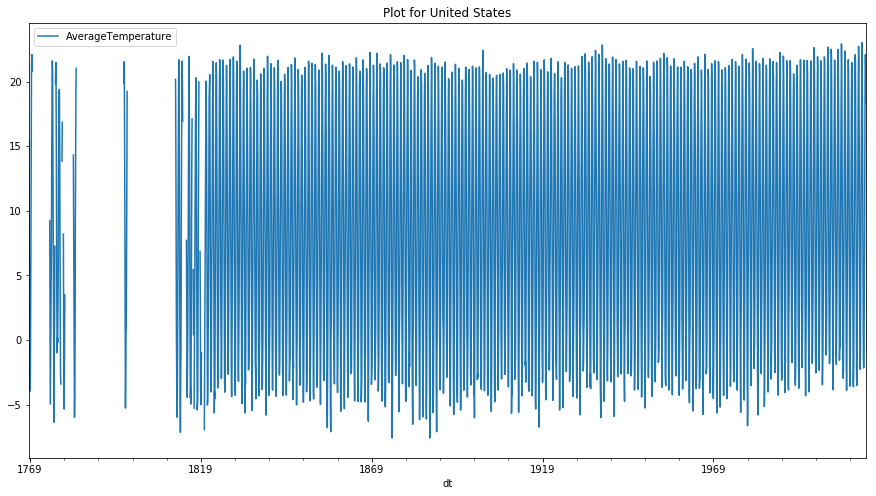

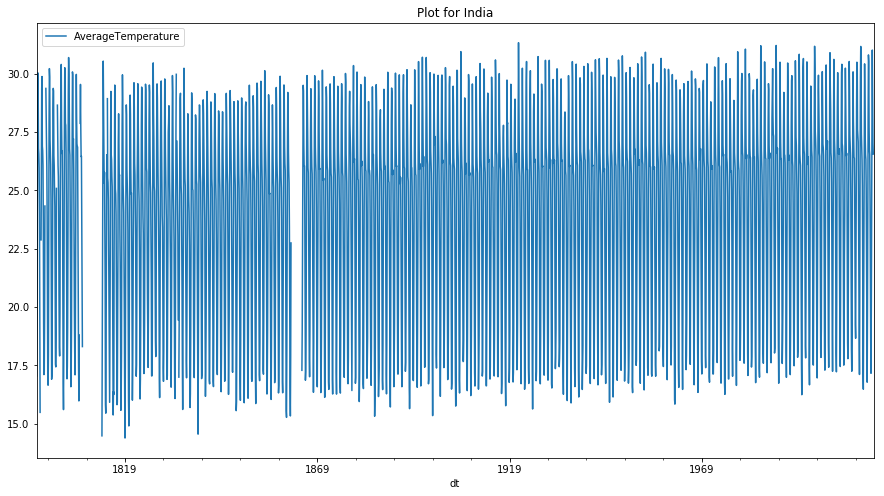

In [234]:
# plot for a couple of the countries
df_country[(df_country['Country'] == 'United States')].plot(x='dt', y='AverageTemperature', figsize=(15,8), title='Plot for United States')
df_country[(df_country['Country'] == 'India')].plot(x='dt', y='AverageTemperature', figsize=(15,8), title='Plot for India')

In [236]:
#A list of 10 countries have been used for this analysis
#Countries claimed as global warming contributors: China, United States, India, Russia, Japan
#Other countries: Mexico, Chile, Libya, Morocco, Australia
countries_list = ['China','United States','India','Russia','Japan','Mexico','Chile','Libya','Morocco','Australia']
df_Countries_Filtered = df_country[df_country['Country'].isin(countries_list)]
print('Number of countries: {}'.format(df_Countries_Filtered.Country.nunique()))
df_Countries_Filtered

Number of countries: 10


dt  AverageTemperature  AverageTemperatureUncertainty  \
34816  1852-07-01              14.116                          1.530   
34817  1852-08-01              15.330                          1.400   
34818  1852-09-01              18.740                          1.446   
34819  1852-10-01              21.984                          1.493   
34820  1852-11-01              24.073                          1.466   
34821  1852-12-01              26.888                          1.840   
34822  1853-01-01              26.953                          1.393   
34823  1853-02-01              25.905                          1.411   
34824  1853-03-01              24.071                          1.596   
34825  1853-04-01              20.587                          1.473   
34826  1853-05-01              17.231                          1.396   
34827  1853-06-01              14.220                          1.519   
34828  1853-07-01              14.433                          1.340   
34829  1853-08-01              16.168                          1.401   
34830  1853-09-01              18.835                          1.434   
34831  1853-10-01              21.911                          1.429   
34832  1853-11-01              24.625                          1.644   
34833  1853-12-01              26.560                          1.480   
34834  1854-01-01              26.809                          1.535   
34835  1854-02-01                 NaN                            NaN   
34836  1854-03-01                 NaN                            NaN   
34837  1854-04-01                 NaN                            NaN   
34838  1854-05-01              17.891                          1.465   
34839  1854-06-01              14.213                          1.392   
34840  1854-07-01              14.510                          1.517   
34841  1854-08-01              16.079                          1.479   
34842  1854-09-01              18.653                          1.354   
34843  1854-10-01              22.723                          1.531   
34844  1854-11-01              24.822                          1.303   
34845  1854-12-01              26.863                          1.843   
34846  1855-01-01                 NaN                            NaN   
34847  1855-02-01              27.312                          1.745   
34848  1855-03-01              24.963                          1.496   
34849  1855-04-01              22.462                          1.711   
34850  1855-05-01              18.276                          1.423   
34851  1855-06-01              14.704                          1.388   
34852  1855-07-01              13.901                          1.331   
34853  1855-08-01              15.723                          1.260   
34854  1855-09-01              18.810                          1.438   
34855  1855-10-01              22.162                          1.569   
34856  1855-11-01              24.769                          1.360   
34857  1855-12-01              25.703                          2.071   
34858  1856-01-01              27.850                          1.738   
34859  1856-02-01              26.574                          1.909   
34860  1856-03-01              25.380                          2.210   
34861  1856-04-01              21.632                          1.580   
34862  1856-05-01              17.296                          1.652   
34863  1856-06-01              15.046                          1.646   
34864  1856-07-01              13.663                          1.420   
34865  1856-08-01              15.469                          1.667   
34866  1856-09-01              18.399                          1.649   
34867  1856-10-01              21.584                          1.538   
34868  1856-11-01              24.563                          1.563   
34869  1856-12-01              26.324                          1.755   
34870  1857-01-01              26.932                  

In [237]:
#Imputing missing values: Since the data was missing in chunks for some countries, a function that takes a mean of before and 
# after values of a missing value has been implemented

def calculate_missingvals(df_missing):
    count = 0
    for index, row in df_missing.iterrows():
        df_new = pd.DataFrame()
        df_new = df_Countries_Filtered[((df_Countries_Filtered['Month'] == row['Month']) & (df_Countries_Filtered['Country'] == row['Country']) & (df_Countries_Filtered.AverageTemperature.notnull())) | ((df_Countries_Filtered.index == index) & (df_Countries_Filtered['Country'] == row['Country']))]
     
        df_new.reset_index(drop=True, inplace=True)
        i = (df_new[(df_new['Country']==row['Country']) & (df_new['dt']==row['dt'])].index)[0]
        if len(df_new.iloc[i-1:i].AverageTemperature) > 0:
            prev = df_new.iloc[i-1:i].AverageTemperature.values[0]
        else:
            prev = 0
            
        if len(df_new.iloc[i+1:i+2].AverageTemperature) > 0:  
            nxt = df_new.iloc[i+1:i+2].AverageTemperature.values[0]
        else:
            nxt = 0
           
        df_Countries_Filtered.loc[index,'AverageTemperature'] = (prev + nxt) if prev==0 or nxt==0 else (prev + nxt)/2
        count += 1

df_missingvals = df_Countries_Filtered[~df_Countries_Filtered.AverageTemperature.notnull()]
calculate_missingvals(df_missingvals)

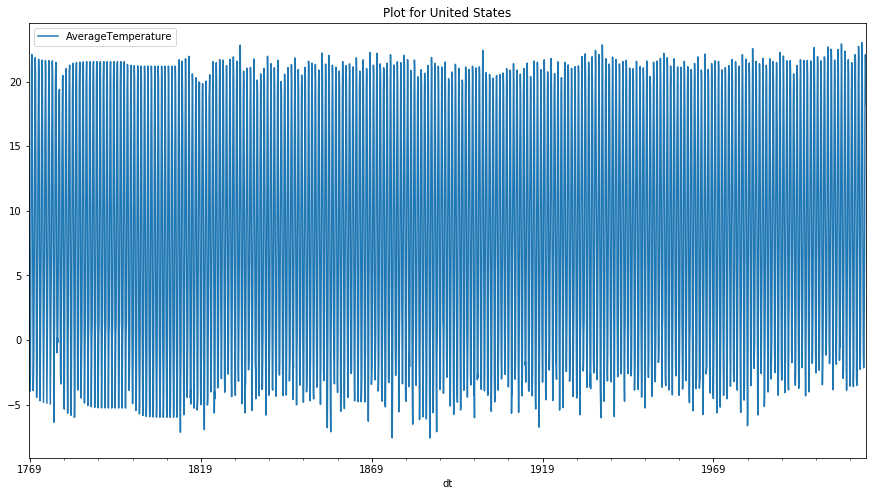

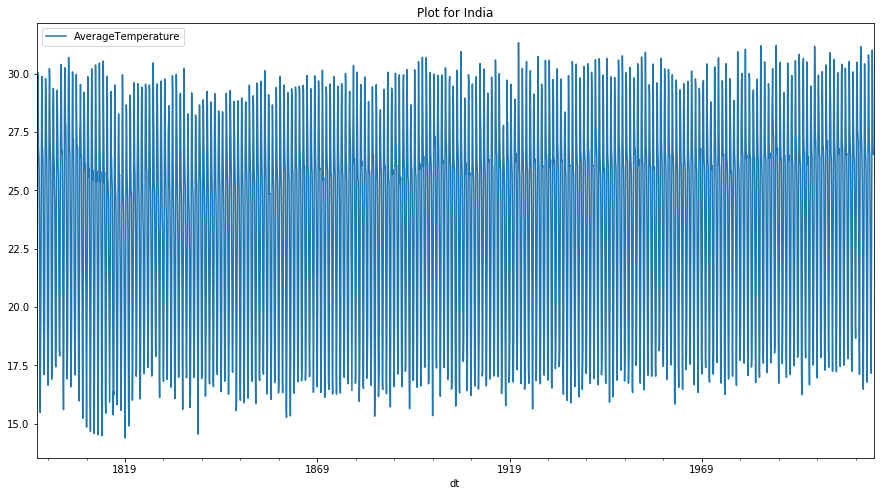

In [238]:
#Plots for two random countries (USA and India) after imputation
df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'United States')].plot(x='dt', y='AverageTemperature', figsize=(15,8), title='Plot for United States')
df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'India')].plot(x='dt', y='AverageTemperature', figsize=(15,8), title='Plot for India')

In [271]:
#Creating individual dataframes for each selected country
#'China','United States','India','Russia','Japan','Mexico','Chile','Libya','Morocco','Australia'

df_China = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'China')]
df_China.index = pd.to_datetime(df_China.dt)
df_China.name = 'China'
df_China.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_UnitedStates = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'United States')]
df_UnitedStates.index = pd.to_datetime(df_UnitedStates.dt)
df_UnitedStates.name = 'United States'
df_UnitedStates.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_India = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'India')]
df_India.index = pd.to_datetime(df_India.dt)
df_India.name = 'India'
df_India.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_Russia = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'Russia')]
df_Russia.index = pd.to_datetime(df_Russia.dt)
df_Russia.name = 'Russia'
df_Russia.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_Japan = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'Japan')]
df_Japan.index = pd.to_datetime(df_Japan.dt)
df_Japan.name = 'Japan'
df_Japan.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_Mexico = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'Mexico')]
df_Mexico.index = pd.to_datetime(df_Mexico.dt)
df_Mexico.name = 'Mexico'
df_Mexico.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_Chile = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'Chile')]
df_Chile.index = pd.to_datetime(df_Chile.dt)
df_Chile.name = 'Chile'
df_Chile.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_Libya = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'Libya')]
df_Libya.index = pd.to_datetime(df_Libya.dt)
df_Libya.name = 'Libya'
df_Libya.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_Morocco = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'Morocco')]
df_Morocco.index = pd.to_datetime(df_Morocco.dt)
df_Morocco.name = 'Morocco'
df_Morocco.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

df_Australia = df_Countries_Filtered[(df_Countries_Filtered['Country'] == 'Australia')]
df_Australia.index = pd.to_datetime(df_Australia.dt)
df_Australia.name = 'Australia'
df_Australia.drop(['dt','AverageTemperatureUncertainty','Country','Year','Month'],axis=1,inplace=True)

dfs_gb = [df_China, df_UnitedStates, df_India, df_Russia, df_Japan]
dfs_nogb = [df_Mexico, df_Chile, df_Libya, df_Morocco, df_Australia]

In [299]:
#Trend plots for selected countries
def TrendPlots(df_list, title):
    fig, ax = plt.subplots()
    for df in (df_list):
        df_count = len(df)
        df_split = int(df_count/10)
        Avg_Temps = pd.Series()
        for i in range(0, df_count, df_split):
            if i+df_split < df_count:
                Avg_Temps[df.index[i+df_split]] = df[i:i+df_split]['AverageTemperature'].mean()
        #plt.plot(data=Avg_Temps, label=df.name)
        ax = Avg_Temps.plot(figsize=(15, 8), label=df.name) 
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

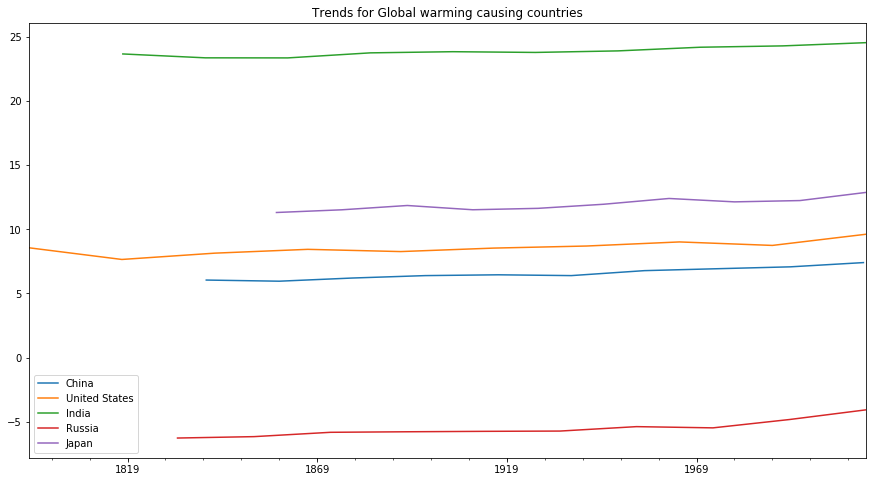

In [300]:
TrendPlots(dfs_gb, 'Trends for Global warming causing countries')

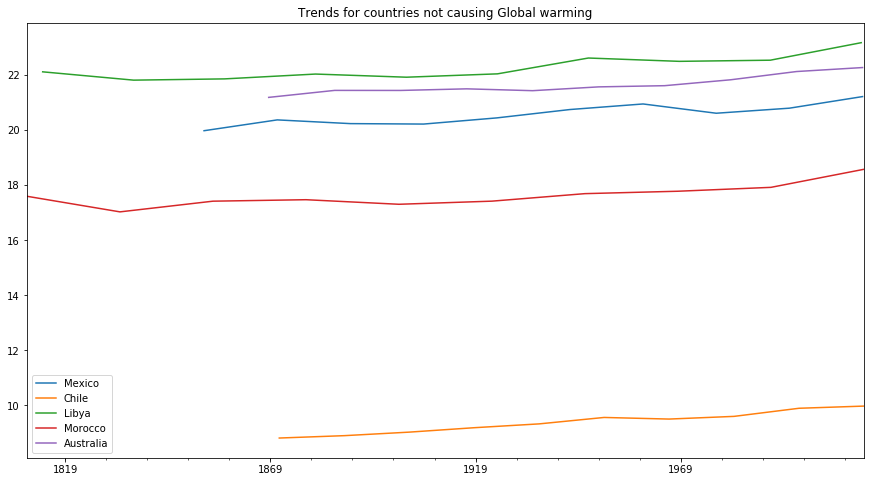

In [301]:
TrendPlots(dfs_nogb, 'Trends for countries not causing Global warming')

<b>Most of the countries, troublemakers and non-troublemakers, are following similar temperature patterns. There is a steady rise in temperatures till late 1990s and then the a steep spike.</b>

<h1>Conclusion:</h1><br/>
<b>Just like the global trend, from the above graphs it is evident that the temperatures have increased for all the countries in recent years. Also, it is important to mention that temperatues are increasing naturally to a certain degree. But external influences like CO2 emissions are speeding up the process. This is a situation that requires policy makers' immediate attention.  </b> 